<a href="https://colab.research.google.com/github/gkpatell/INDE-577-Final-Project/blob/main/Supervised%20Learning/The%20Perceptron/SL_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Import Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, label_binarize
from sklearn.linear_model import Perceptron
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_curve, average_precision_score
)

## Step 2: Load and Explore the Dataset

In [ ]:
# Load the Heart Disease Dataset from the UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data = pd.read_csv(url, names=columns, na_values="?")

### Initial Dataset Analysis

In [ ]:
# Display basic dataset information
print("Initial Dataset Shape:", data.shape)
print("Missing Values:")
print(data.isnull().sum())

Initial Dataset Shape: (303, 14)
Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


In [ ]:
# Handle missing values
data.dropna(inplace=True)
print("Dataset Shape After Dropping Missing Values:", data.shape)

Dataset Shape After Dropping Missing Values: (297, 14)


              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    3.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.055556    1.602694    0.676768   
std      0.994914   22.9415

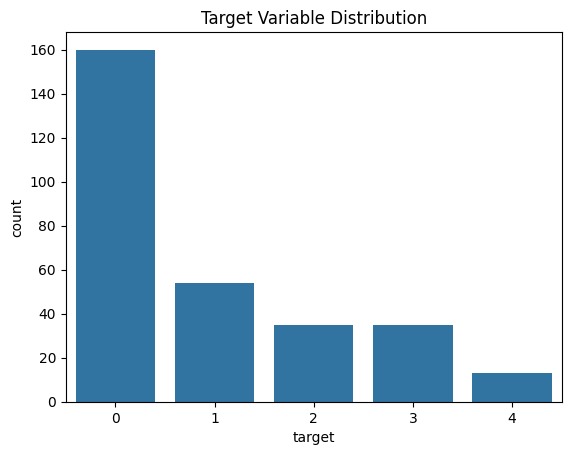

In [ ]:
# Display dataset statistics and target distribution
print(data.describe())
sns.countplot(x='target', data=data)
plt.title('Target Variable Distribution')
plt.show()

## Step 3: Preprocessing the Data

In [ ]:
# Define features and labels
X = data.drop(columns=['target'])
y = data['target']

In [ ]:
# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Generate polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

## Step 4: Implement the Perceptron Algorithm

In [ ]:
# Initialize the Perceptron model & train the model
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron.fit(X_train, y_train)

Perceptron(random_state=42)

In [ ]:
#Train the Perceptron with polynomial features
perceptron_poly = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron_poly.fit(X_train_poly, y_train)

Perceptron(random_state=42)

In [ ]:
# Predictions
y_pred = perceptron.predict(X_test)
y_pred_poly = perceptron_poly.predict(X_test_poly)

## Step 5: Evaluate the Model

In [ ]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.53


In [ ]:
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print(f"Polynomial Accuracy: {accuracy_poly:.2f}")

Polynomial Accuracy: 0.48


In [ ]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.91      0.81        32
           1       0.08      0.09      0.09        11
           2       0.50      0.29      0.36         7
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         3

    accuracy                           0.53        60
   macro avg       0.26      0.26      0.25        60
weighted avg       0.46      0.53      0.49        60



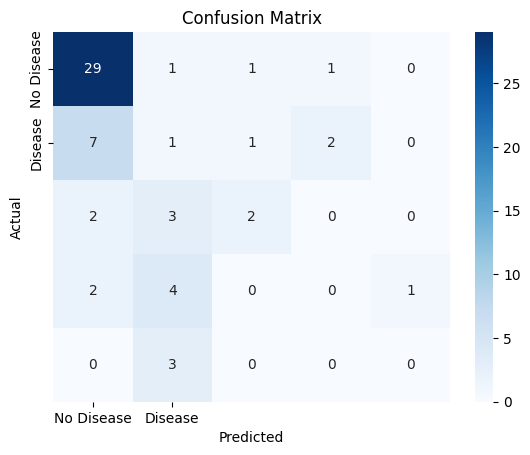

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
# Calibrate the Perceptron model to get probabilities
calibrated_perceptron = CalibratedClassifierCV(perceptron_poly, method="sigmoid", cv="prefit")
calibrated_perceptron.fit(X_train_poly, y_train) # Fit using the training data

CalibratedClassifierCV(cv='prefit', estimator=Perceptron(random_state=42))

## Step 6: Performance and Error Analysis

In [ ]:
# Analyze False Positives and False Negatives
false_positives = ((y_test == 0) & (y_pred == 1)).sum()
false_negatives = ((y_test == 1) & (y_pred == 0)).sum()

print(f"False Positives: {false_positives}")
print(f"False Negatives: {false_negatives}")

False Positives: 1
False Negatives: 7


In [ ]:
# Investigate incorrectly classified samples
misclassified_indices = np.where(y_test != y_pred)[0]
print("Misclassified Samples:")
print(data.iloc[misclassified_indices])

Misclassified Samples:
     age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
6   62.0  0.0  4.0     140.0  268.0  0.0      2.0    160.0    0.0      3.6   
8   63.0  1.0  4.0     130.0  254.0  0.0      2.0    147.0    0.0      1.4   
10  57.0  1.0  4.0     140.0  192.0  0.0      0.0    148.0    0.0      0.4   
13  44.0  1.0  2.0     120.0  263.0  0.0      0.0    173.0    0.0      0.0   
14  52.0  1.0  3.0     172.0  199.0  1.0      0.0    162.0    0.0      0.5   
15  57.0  1.0  3.0     150.0  168.0  0.0      0.0    174.0    0.0      1.6   
16  48.0  1.0  2.0     110.0  229.0  0.0      0.0    168.0    0.0      1.0   
19  49.0  1.0  2.0     130.0  266.0  0.0      0.0    171.0    0.0      0.6   
22  58.0  1.0  2.0     120.0  284.0  0.0      2.0    160.0    0.0      1.8   
23  58.0  1.0  3.0     132.0  224.0  0.0      2.0    173.0    0.0      3.2   
24  60.0  1.0  4.0     130.0  206.0  0.0      2.0    132.0    1.0      2.4   
25  50.0  0.0  3.0     120.0  219.0  0.0 

In [ ]:
# ROC-AUC Analysis
y_prob = calibrated_perceptron.predict_proba(X_test_poly)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

In [ ]:
# Compute ROC curves and AUC scores
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_prob[:, i])

In [ ]:
# Micro-average ROC curve
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
roc_auc["micro"] = roc_auc_score(y_test_bin, y_prob, average="micro")

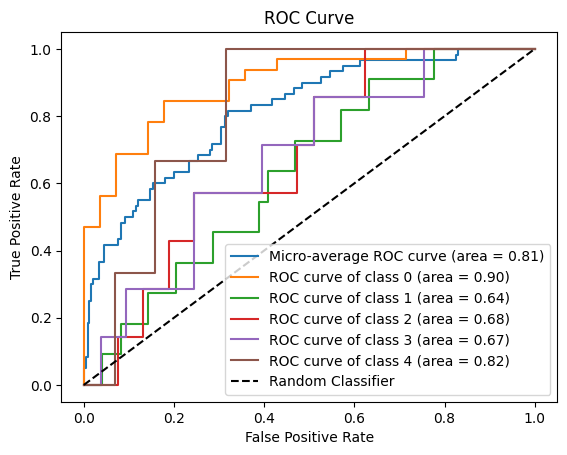

In [ ]:
# Plot ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"], label=f'Micro-average ROC curve (area = {roc_auc["micro"]:.2f})')
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Precision-Recall Analysis
precision, recall, average_precision = dict(), dict(), dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_prob[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_prob[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_prob.ravel())
average_precision["micro"] = average_precision_score(y_test_bin, y_prob, average="micro")

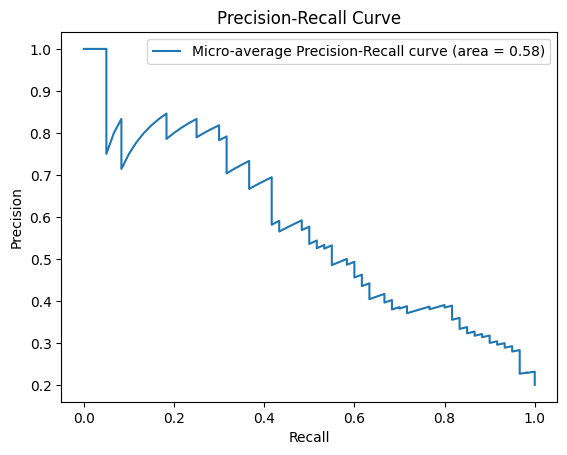

In [ ]:
# Plot Precision-Recall curve
plt.plot(recall["micro"], precision["micro"], label=f'Micro-average Precision-Recall curve (area = {average_precision["micro"]:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

## Step 7: Visualizing Decision Boundaries (First Two Features)

In [ ]:
# Use first two features for visualization
X_train_2D = X_train[:, :2]
X_test_2D = X_test[:, :2]
perceptron_2D = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron_2D.fit(X_train_2D, y_train)

Perceptron(random_state=42)

In [ ]:
# Decision boundary plot
x_min, x_max = X_train_2D[:, 0].min() - 1, X_train_2D[:, 0].max() + 1
y_min, y_max = X_train_2D[:, 1].min() - 1, X_train_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = perceptron_2D.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

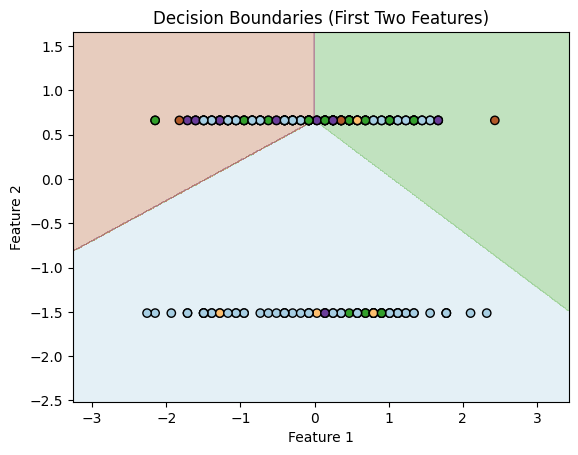

In [ ]:
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.Paired)
plt.title('Decision Boundaries (First Two Features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()